In [2]:
import pandas as pd
df=pd.read_csv('housing.csv')
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [3]:
print(df.columns)
print(df.info())
print(df.describe())

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000     

In [4]:
print(df.columns)
print(df['Price'].head())

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64


In [5]:
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


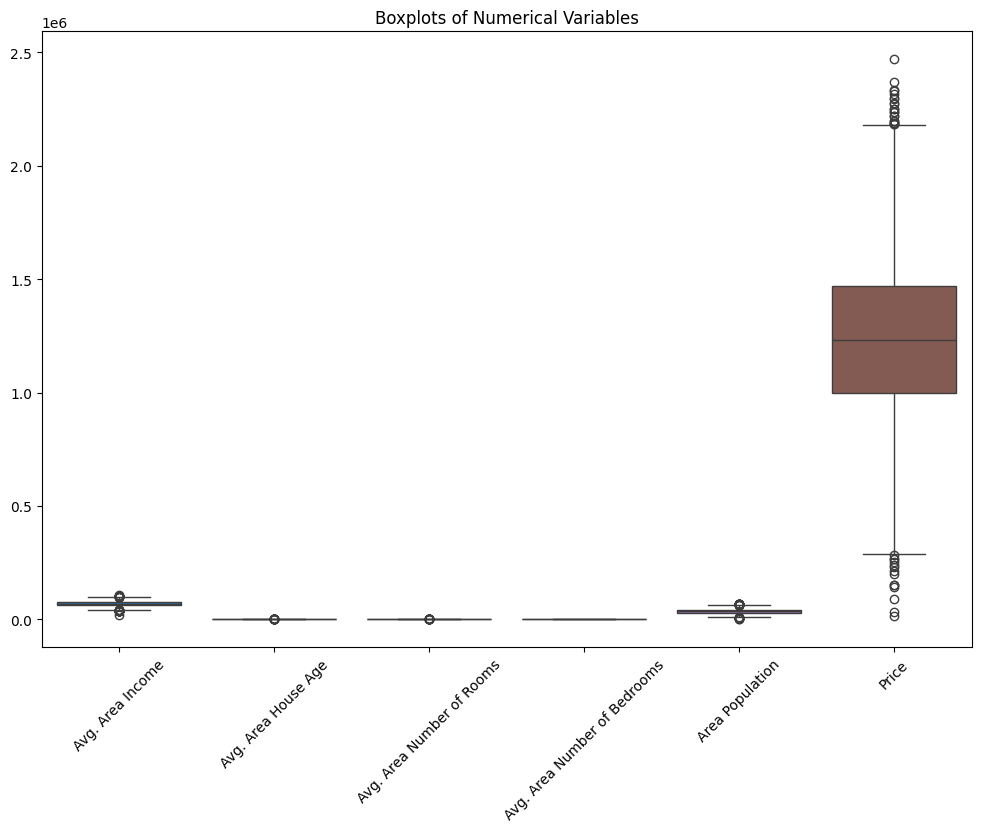

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                     'Avg. Area Number of Bedrooms', 'Area Population', 'Price']])
plt.title('Boxplots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

In [7]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

print("Number of outliers:", outliers.shape[0])
print("Outliers:")
print(outliers)
median_price = df['Price'].median()
df['Price'] = df['Price'].apply(lambda x: median_price if x < lower_bound or x > upper_bound else x)

print("After handling outliers:")
print(df.describe())


Number of outliers: 35
Outliers:
      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
90         48904.98327             4.844973                   5.448956   
256        91159.41833             6.536045                   7.373851   
263        40366.61629             4.902940                   7.617118   
355        87266.34023             8.248959                   7.234261   
465        90592.46961             7.700132                   9.708803   
622        90890.48581             7.510171                   7.595487   
693       107701.74840             7.143522                   8.518608   
696        49851.13478             4.684996                   5.259695   
715        92280.49747             7.258627                   8.222633   
901        89089.43207             7.146246                   9.179994   
924        83814.10116             8.571797                   7.392164   
990        82915.91143             7.078994                   7.882701   
1208 

In [8]:
print(df.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [9]:
columns_to_drop = ['Address', 'Price_zscore']  
df = df.drop(columns=columns_to_drop) 
print(df.head())

KeyError: "['Price_zscore'] not found in axis"

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

X, y = make_classification(n_samples=100, n_features=10, random_state=42)

X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

k_best_features = 5

selector = SelectKBest(score_func=f_classif, k=k_best_features)

X_selected = selector.fit_transform(X_scaled, y)

selected_feature_names = X.columns[selector.get_support()]

selected_features_df = pd.DataFrame(X_selected, columns=selected_feature_names)

print(selected_features_df.head())


   Feature_0  Feature_1  Feature_2  Feature_3  Feature_9
0   0.298257   0.790521   0.665984   0.743001   0.000000
1   0.503544   0.243093   0.620667   0.146077   0.758937
2   0.674875   0.662367   0.251148   0.755704   0.503009
3   0.632541   0.437349   0.388420   0.451547   0.499839
4   0.835132   0.179724   0.236704   0.219801   0.756817


In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

X, y = make_classification(n_samples=100, n_features=10, random_state=42)

X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

clf.fit(X_scaled, y)
feature_importances = clf.feature_importances_

k_best_features = 5
top_k_indices = np.argsort(feature_importances)[::-1][:k_best_features]

selected_feature_names = X.columns[top_k_indices]

selected_features_df = X[selected_feature_names]

print(selected_features_df.head())


   Feature_2  Feature_0  Feature_3  Feature_1  Feature_9
0   0.861991  -1.140526   0.846092   1.359706  -2.081929
1   0.627375  -0.078734  -1.193006  -1.329332   1.451144
2  -1.285680   0.807427   0.889484   0.730198   0.259723
3  -0.575002   0.588465  -0.149518  -0.375121   0.244967
4  -1.360456   1.636312  -0.941163  -1.640607   1.441273


In [12]:
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter

X, y = make_classification(n_samples=1000, n_features=10, weights=[0.95, 0.05], random_state=42)

y = pd.Series(y)

print("Class Distribution:")
print(y.value_counts())

# Check imbalance ratio
imbalance_ratio = y.value_counts()[0] / y.value_counts()[1]
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Class Distribution:
0    947
1     53
Name: count, dtype: int64
Imbalance Ratio: 17.87


In [13]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)r
X_resampled, y_resampled = oversampler.fit_resample(X, y)
print("Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts())

Resampled Class Distribution:
0    947
1    947
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Shapes of datasets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Shapes of datasets:
X_train: (1515, 10), y_train: (1515,)
X_test: (379, 10), y_test: (379,)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

train_preds = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

test_preds = dt.predict(X_test)

print("Training Accuracy:", train_accuracy)
print("\nClassification Report on Test Data:")
print(classification_report(y_test, test_preds))


Training Accuracy: 1.0

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       192
           1       0.99      1.00      1.00       187

    accuracy                           1.00       379
   macro avg       1.00      1.00      1.00       379
weighted avg       1.00      1.00      1.00       379



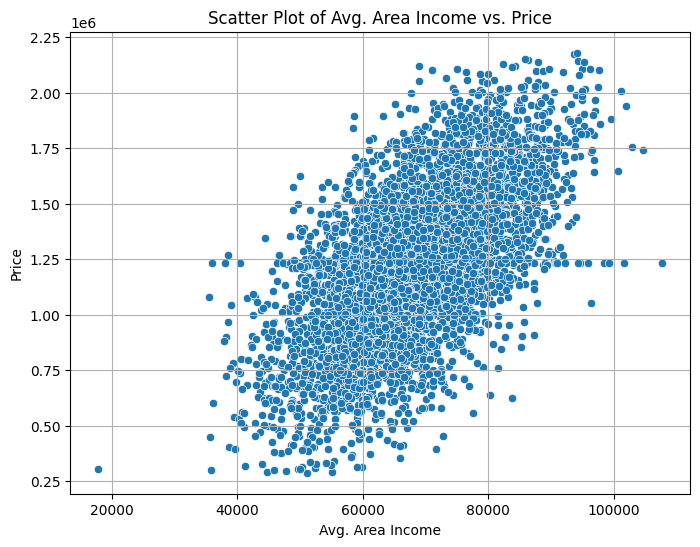

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg. Area Income', y='Price', data=df)
plt.title('Scatter Plot of Avg. Area Income vs. Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.grid(True)
plt.show()

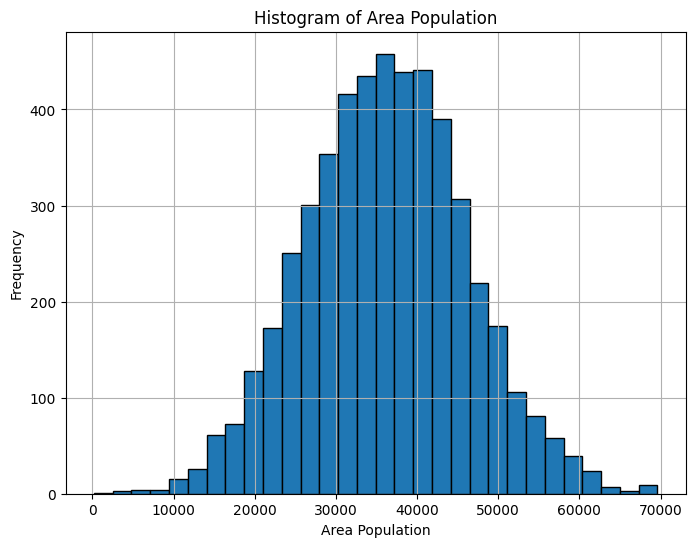

In [24]:
import matplotlib.pyplot as plt

columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
plt.figure(figsize=(8, 6))
plt.hist(df['Area Population'], bins=30, edgecolor='black')  # Adjust bins and edgecolor as needed
plt.title('Histogram of Area Population')
plt.xlabel('Area Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

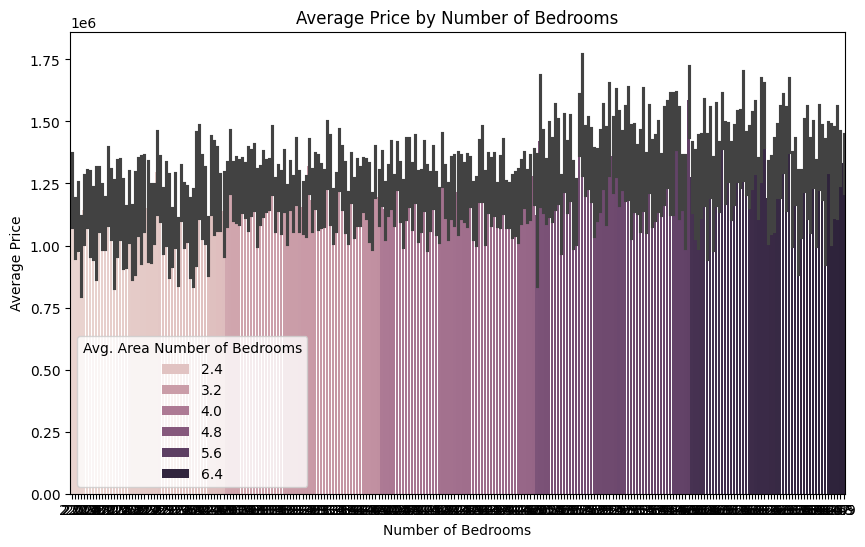

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

plt.figure(figsize=(10, 6))
sns.barplot(x='Avg. Area Number of Bedrooms', y='Price', data=df, hue='Avg. Area Number of Bedrooms')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


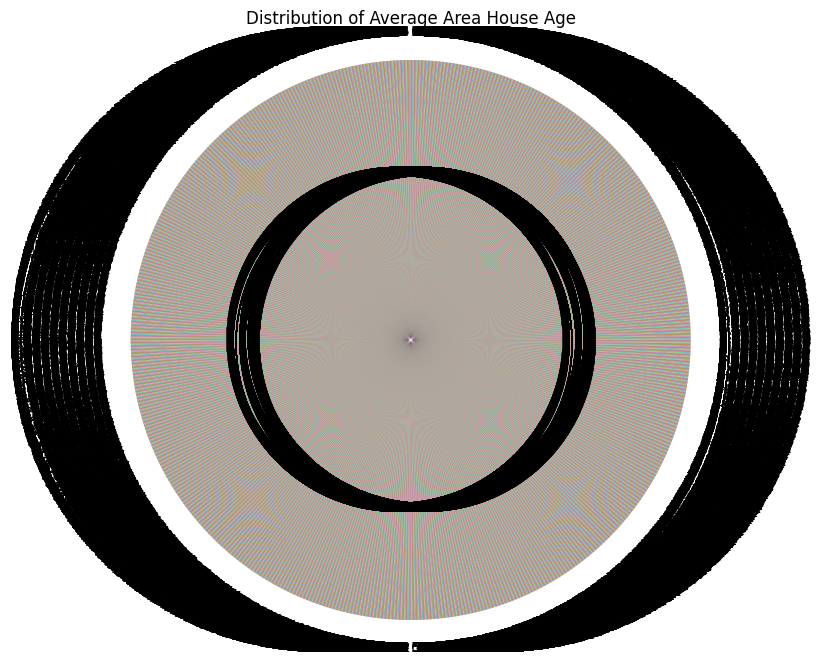

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

house_age_counts = df['Avg. Area House Age'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(house_age_counts, labels=house_age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Average Area House Age')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


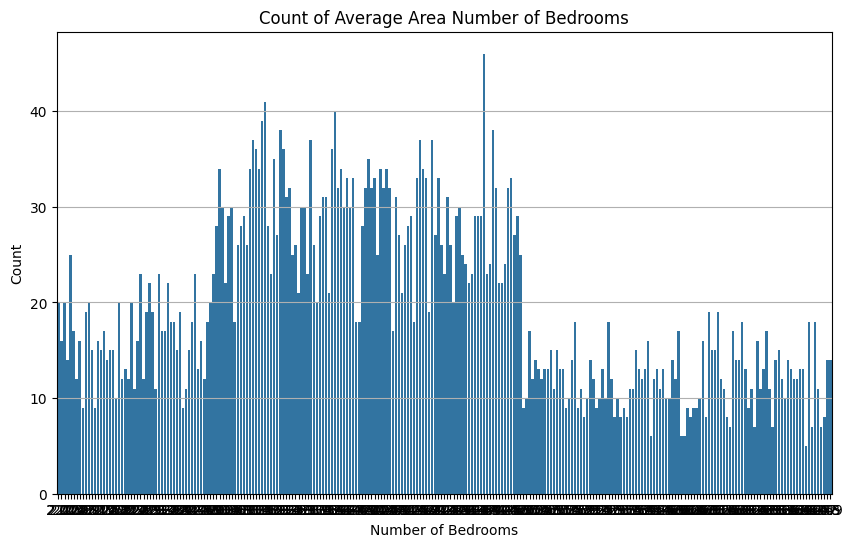

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
plt.figure(figsize=(10, 6))
sns.countplot(x='Avg. Area Number of Bedrooms', data=df)
plt.title('Count of Average Area Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

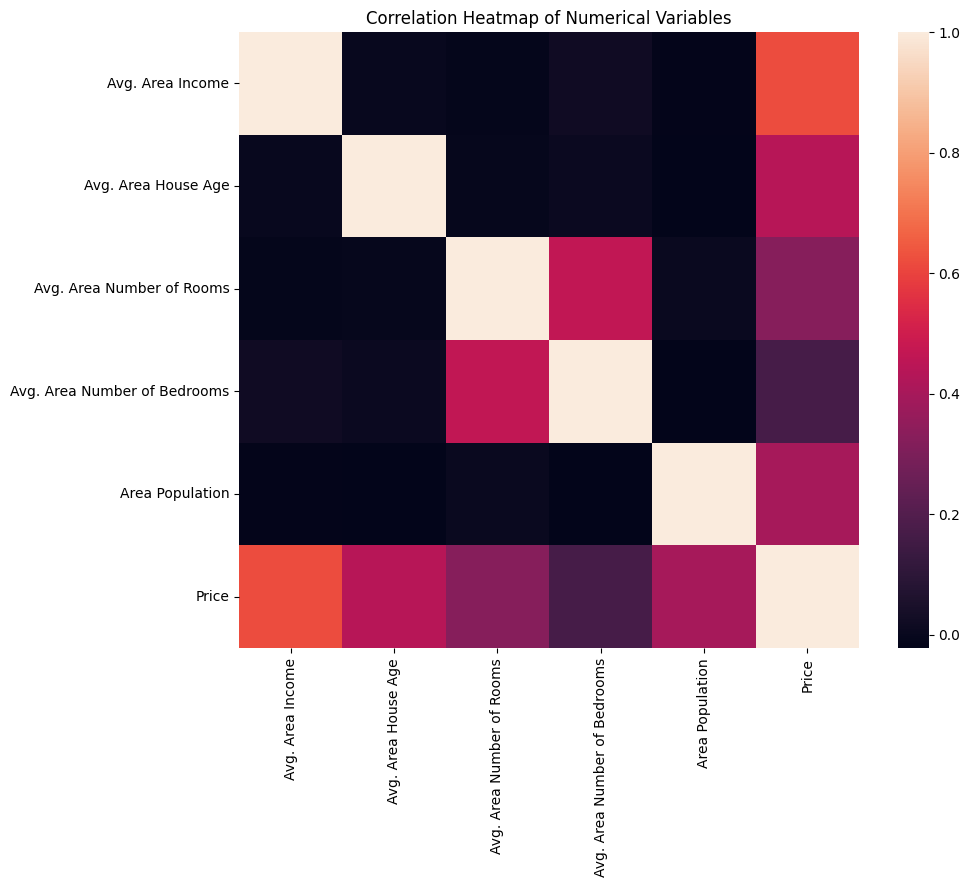

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                     'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()